In the first half of the exercise, we will implement regularized linear regression to predict the amaount of water flowing out of a dam using the change of water level in a reservoir. Let's first load in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import optimize

In [2]:
data = loadmat('ex5data1.mat')
Xtrain = data['X']
Xtrain = np.insert(Xtrain, 0, 1, axis=1)
ytrain = data['y']
theta = np.array([1, 1])
regParam = 1
display(Xtrain.shape, ytrain.shape, theta.shape)

(12, 2)

(12, 1)

(2,)

Text(0, 0.5, 'Water flowing out of the dam (y)')

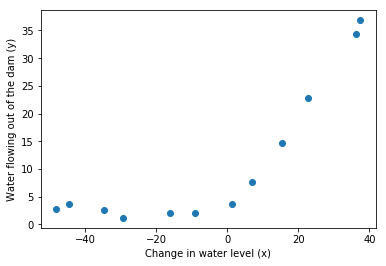

In [3]:
plt.scatter(Xtrain[:,1], ytrain)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

Above is a graph of our data. In this first half of the exercise, we will be fitting a straight line to our data, and then later on use polynomial regression to find a better fit to the data. To accomplish the first part, lets implement our regularized linear regression cost function and gradient.

In [4]:
def regLinearCost(theta, X, y, regParam): 
    m, n = X.shape
    theta = np.reshape(theta, (n,1))
    h = X @ theta
    inner = (h - y)**2
    left = inner.sum()/(2*m)
    reg_theta = theta.copy() 
    reg_theta[0] = 0
    reg = (regParam/(2*m))*(reg_theta**2).sum()
    return left + reg

In [5]:
regLinearCost(theta, Xtrain, ytrain, 1)

303.9931922202643

In [6]:
def regLinearGradient(theta, X, y, regParam):
    m, n = X.shape
    theta = np.reshape(theta, (n,1))
    h = X @ theta
    inner = h - y
    inner = X.T @ (h - y)
    outer = inner/m
    reg_theta = theta.copy()
    reg_theta[0] = 0
    reg = (regParam/m)*reg_theta
    return (outer + reg).flatten()

In [7]:
regLinearGradient(theta, Xtrain, ytrain, 1)

array([-15.30301567, 598.25074417])

Now that our cost function and gradient are working correctly, we will compute the optimal values of $\theta$

In [10]:
opt_theta = optimize.fmin_cg(regLinearCost, theta, fprime=regLinearGradient, args=(Xtrain, ytrain, regParam))

Optimization terminated successfully.
         Current function value: 22.379542
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


Text(0, 0.5, 'Water flowing out of the dam (y)')

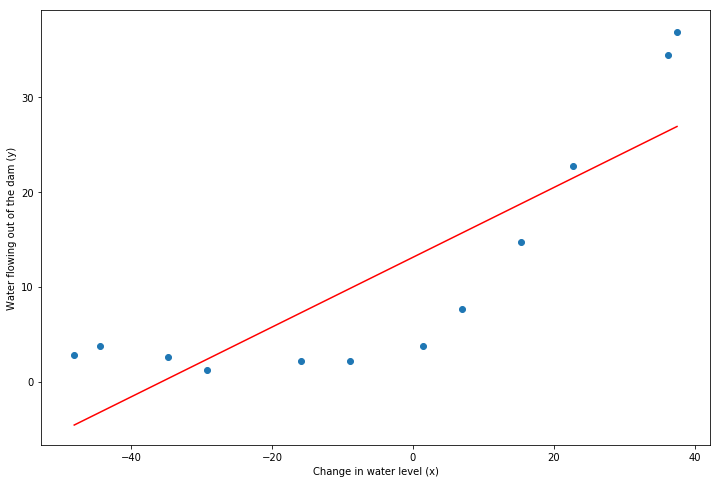

In [13]:
x = np.linspace(Xtrain[:,1].min(), Xtrain[:,1].max(), 100)
f = opt_theta[0] + (opt_theta[1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(Xtrain[:,1], ytrain)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')